In [2]:
#Problem Statement:predict the optimum number of clusters and represent it visually.
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')
from sklearn import datasets
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
#Specify the path of the dataset
iris_df = pd.read_csv(r'C:\Users\STEPHEN VARGHESE\Downloads\Iris.csv')

In [4]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


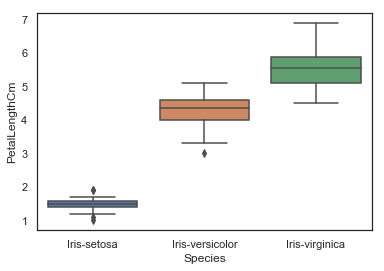

In [5]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris_df)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


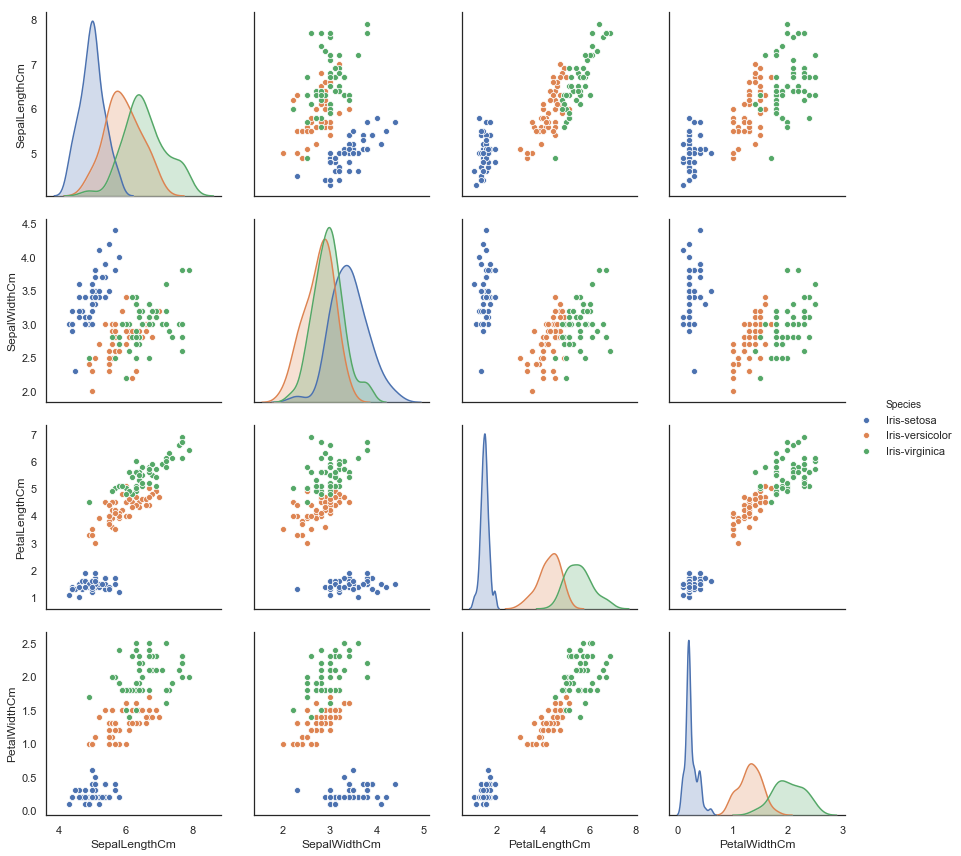

In [6]:
sns.pairplot(iris_df.drop('Id', axis=1), hue='Species', size=3)

In [7]:
#Now lets Process the data by cleanng
# We will remove columns which will not be used for model prediction
iris_df.drop("Id", axis=1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CF8A970>,
      dtype=object)

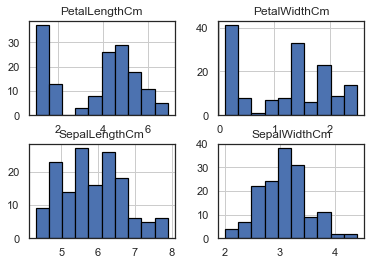

In [8]:
#Lets visualize the complete data once
iris_df.hist(edgecolor='black', linewidth=1.2)

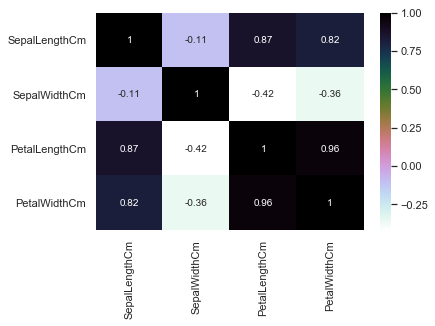

In [9]:
    #Lets visualize the correlation
    sns.heatmap(iris_df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
wcss = []
x = iris_df.iloc[:, [1, 2, 3, 4]].values

In [11]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

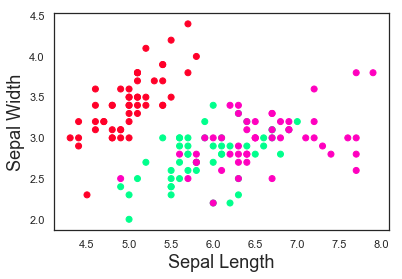

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [63]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=21, tol=0.0001, verbose=0)

In [64]:
#Centres
centers = km.cluster_centers_
print(centers)


[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

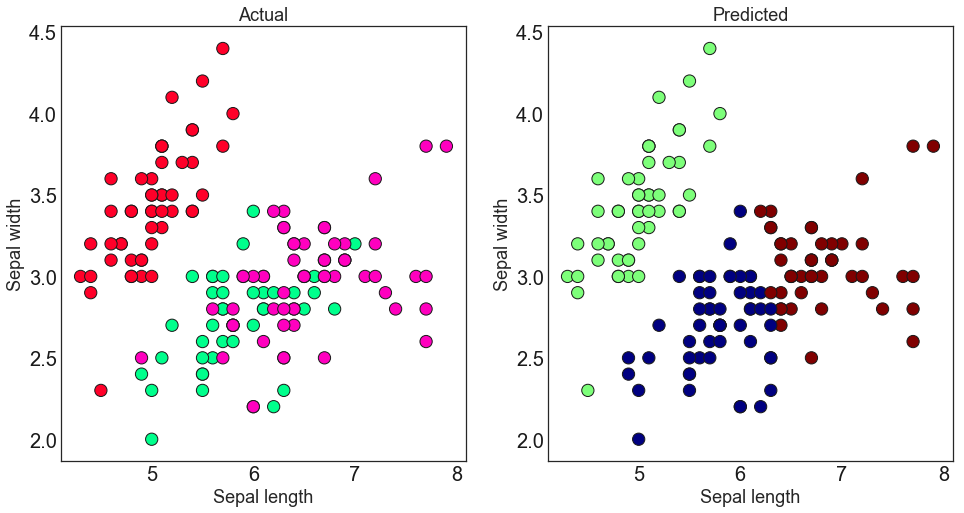

In [65]:
#Now, let’s compare our original data versus our clustered results using the following code.
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Hence the optimal number of Clusters is 3.